In [2]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from jupyterthemes import jtplot
jtplot.style("monokai")

In [34]:
plt.rc('font', family='NanumGothic')

In [5]:
base_path = './20221111/'
df = pd.DataFrame()
for file in os.listdir(base_path):
    df = pd.concat([df, pd.read_csv(base_path + os.sep + file, sep='\t')])

In [6]:
df['job'] = df['title'].apply(lambda x: x[x.index('[')+1:x.index(']')])
df['title'] = df['title'].apply(lambda x: x.split(']')[1].strip())

In [7]:
# remove invalid data
df = df[df['time'].apply(lambda x: len(x) == 5)]

In [8]:
spawn_count = df.groupby(['job', 'time'])['view'].count().reset_index().sort_values(by='time')

In [9]:
spawn_count.columns = ['job', 'time', 'spawn_count']

# 날자에 따른 글 젠량

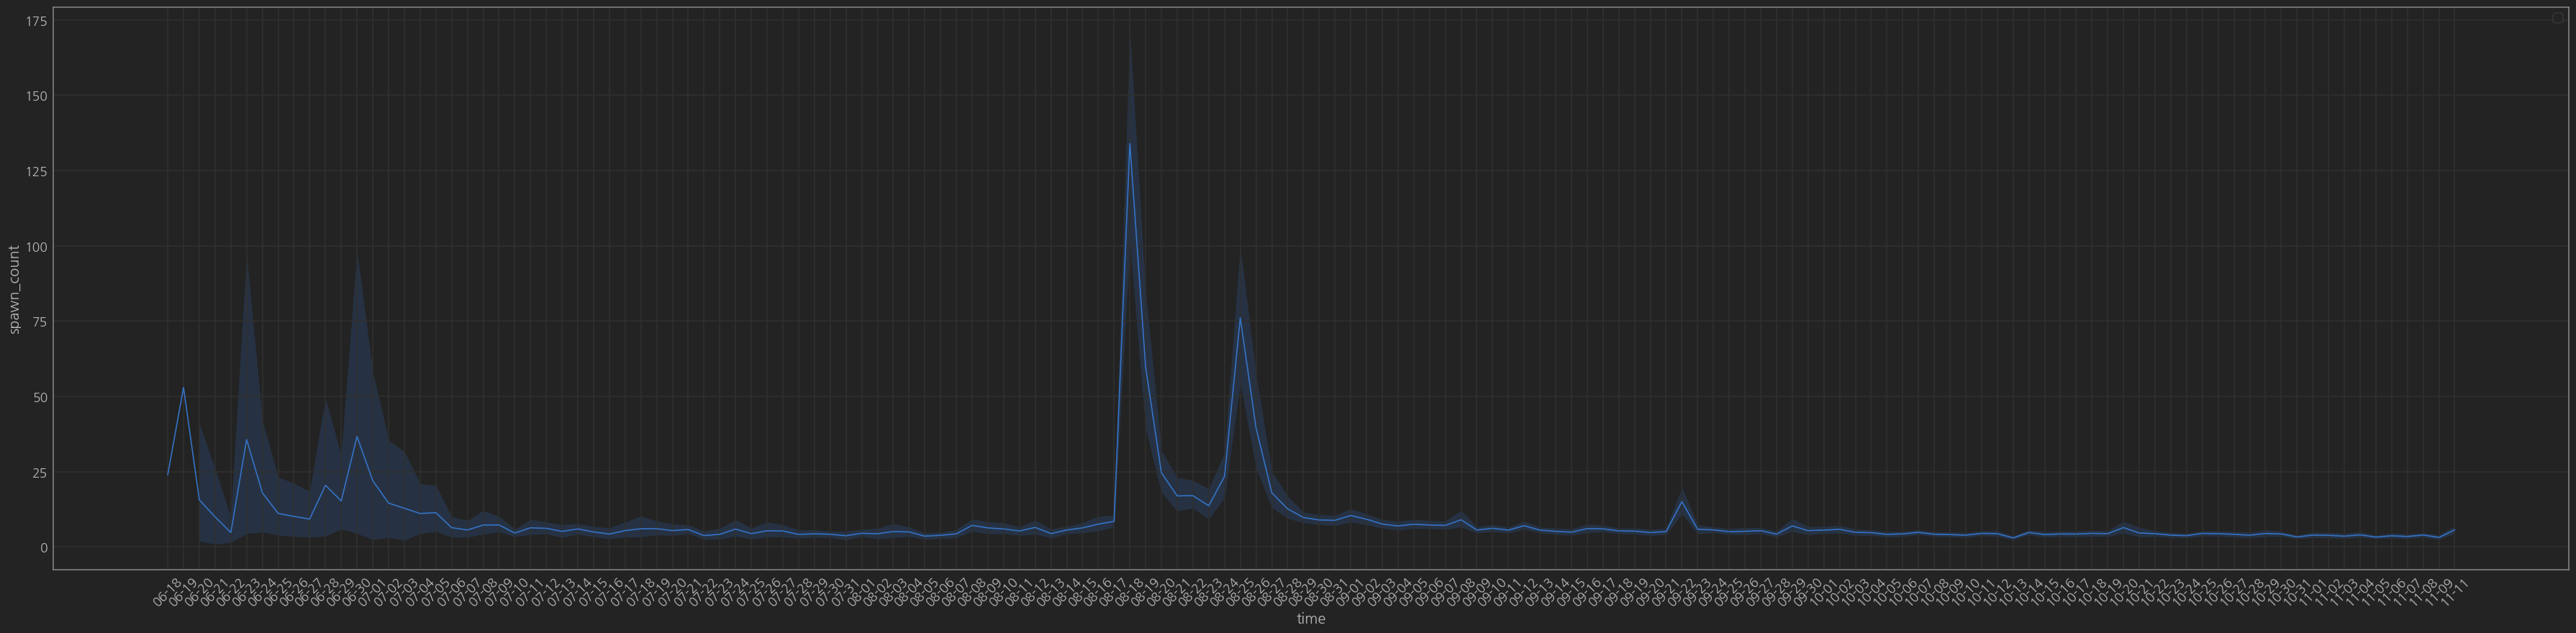

In [92]:
fig = plt.figure(figsize=(36, 9), dpi=100)
g = sns.lineplot(data=spawn_count, x='time', y='spawn_count')
g.tick_params(axis='x', rotation=45)
g.legend(*g.get_legend_handles_labels(), ncol=4)
plt.tight_layout()
plt.show()

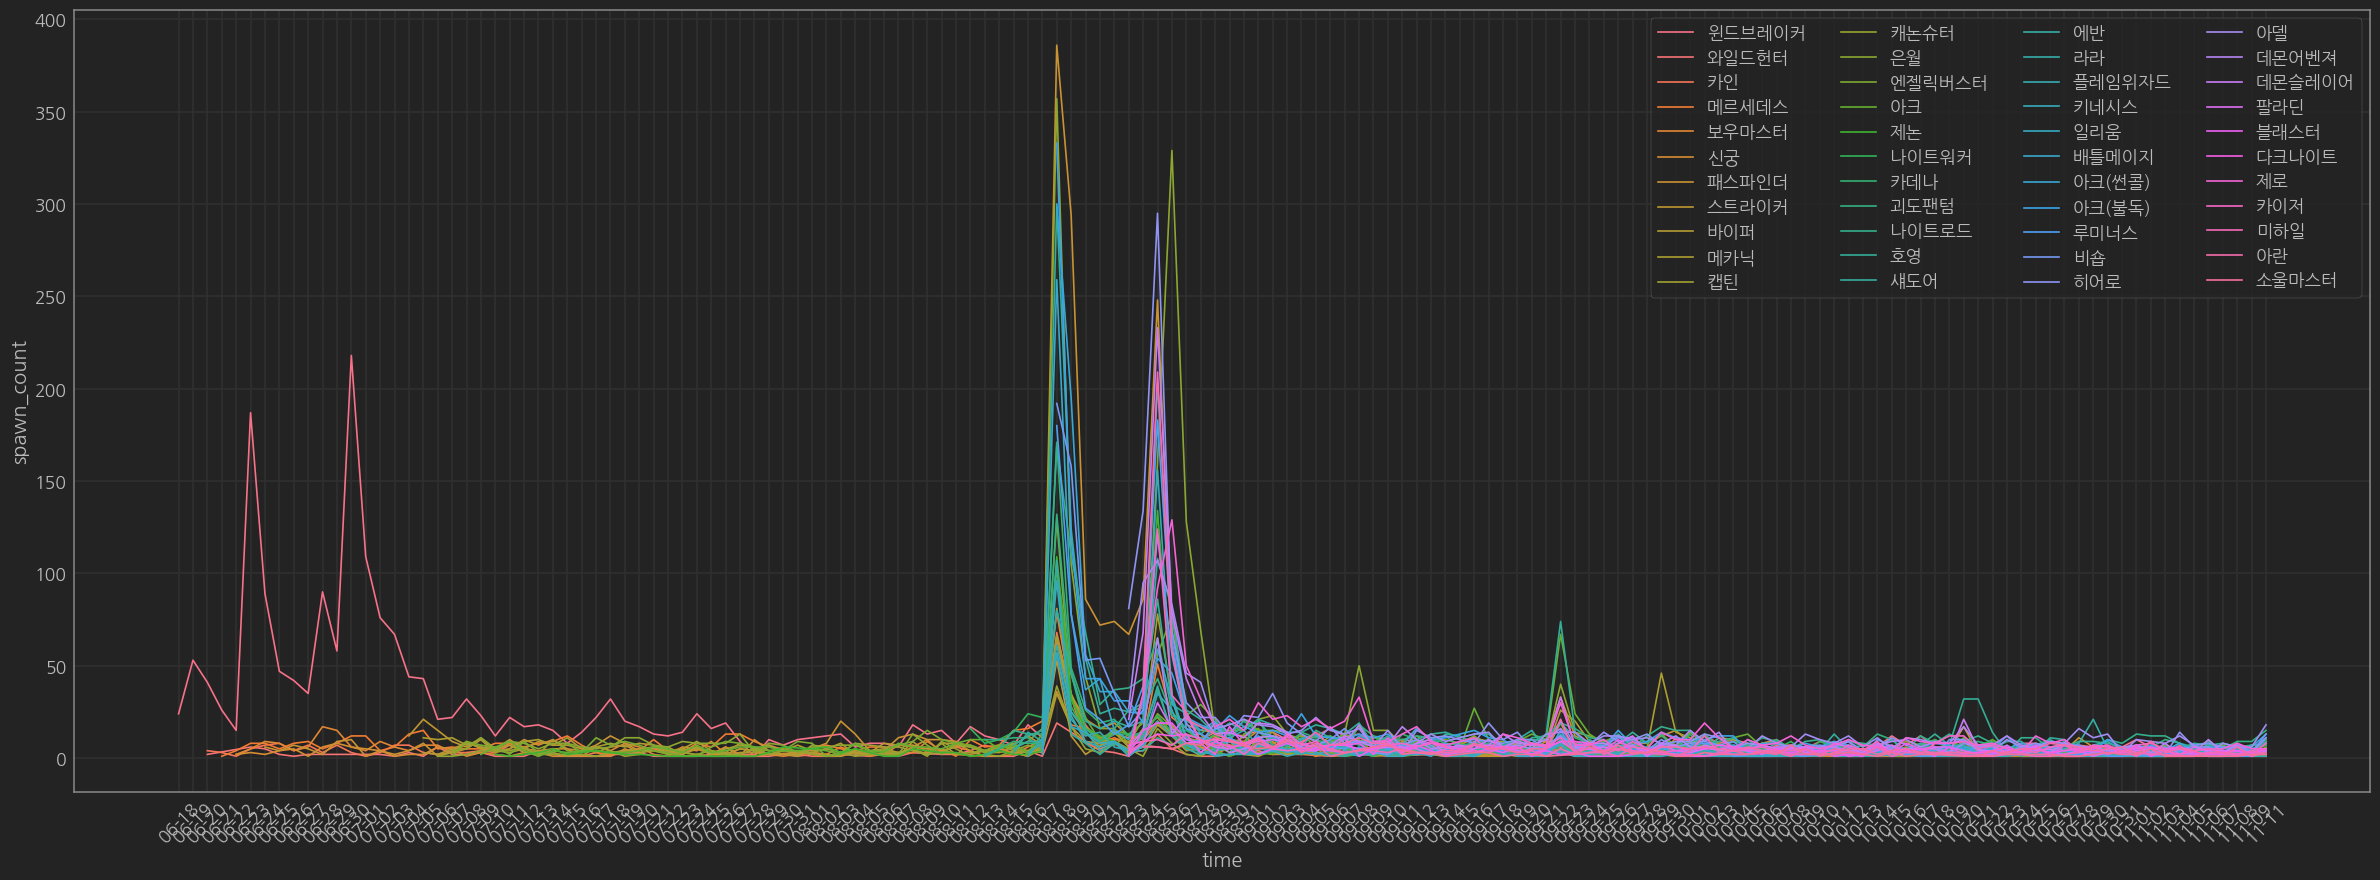

In [91]:
fig = plt.figure(figsize=(24, 9), dpi=100)
g = sns.lineplot(data=spawn_count, x='time', y='spawn_count', hue='job')
g.tick_params(axis='x', rotation=45)
g.legend(*g.get_legend_handles_labels(), ncol=4)
plt.tight_layout()
plt.show()

# 직업에 따른 최대 언급 단어

In [47]:
word_per_job = df.groupby('job')['title'].sum()

In [48]:
def word_counter(x:str):
    ret = dict()
    x = x.split(" ")
    for tok in x:
        if '●' in tok:
            tok = '!시체!'
        if tok not in ret:
            ret[tok] = 0
        ret[tok] += 1
    return ret

In [49]:
word_per_job = word_per_job.apply(lambda x: word_counter(x)).to_dict()

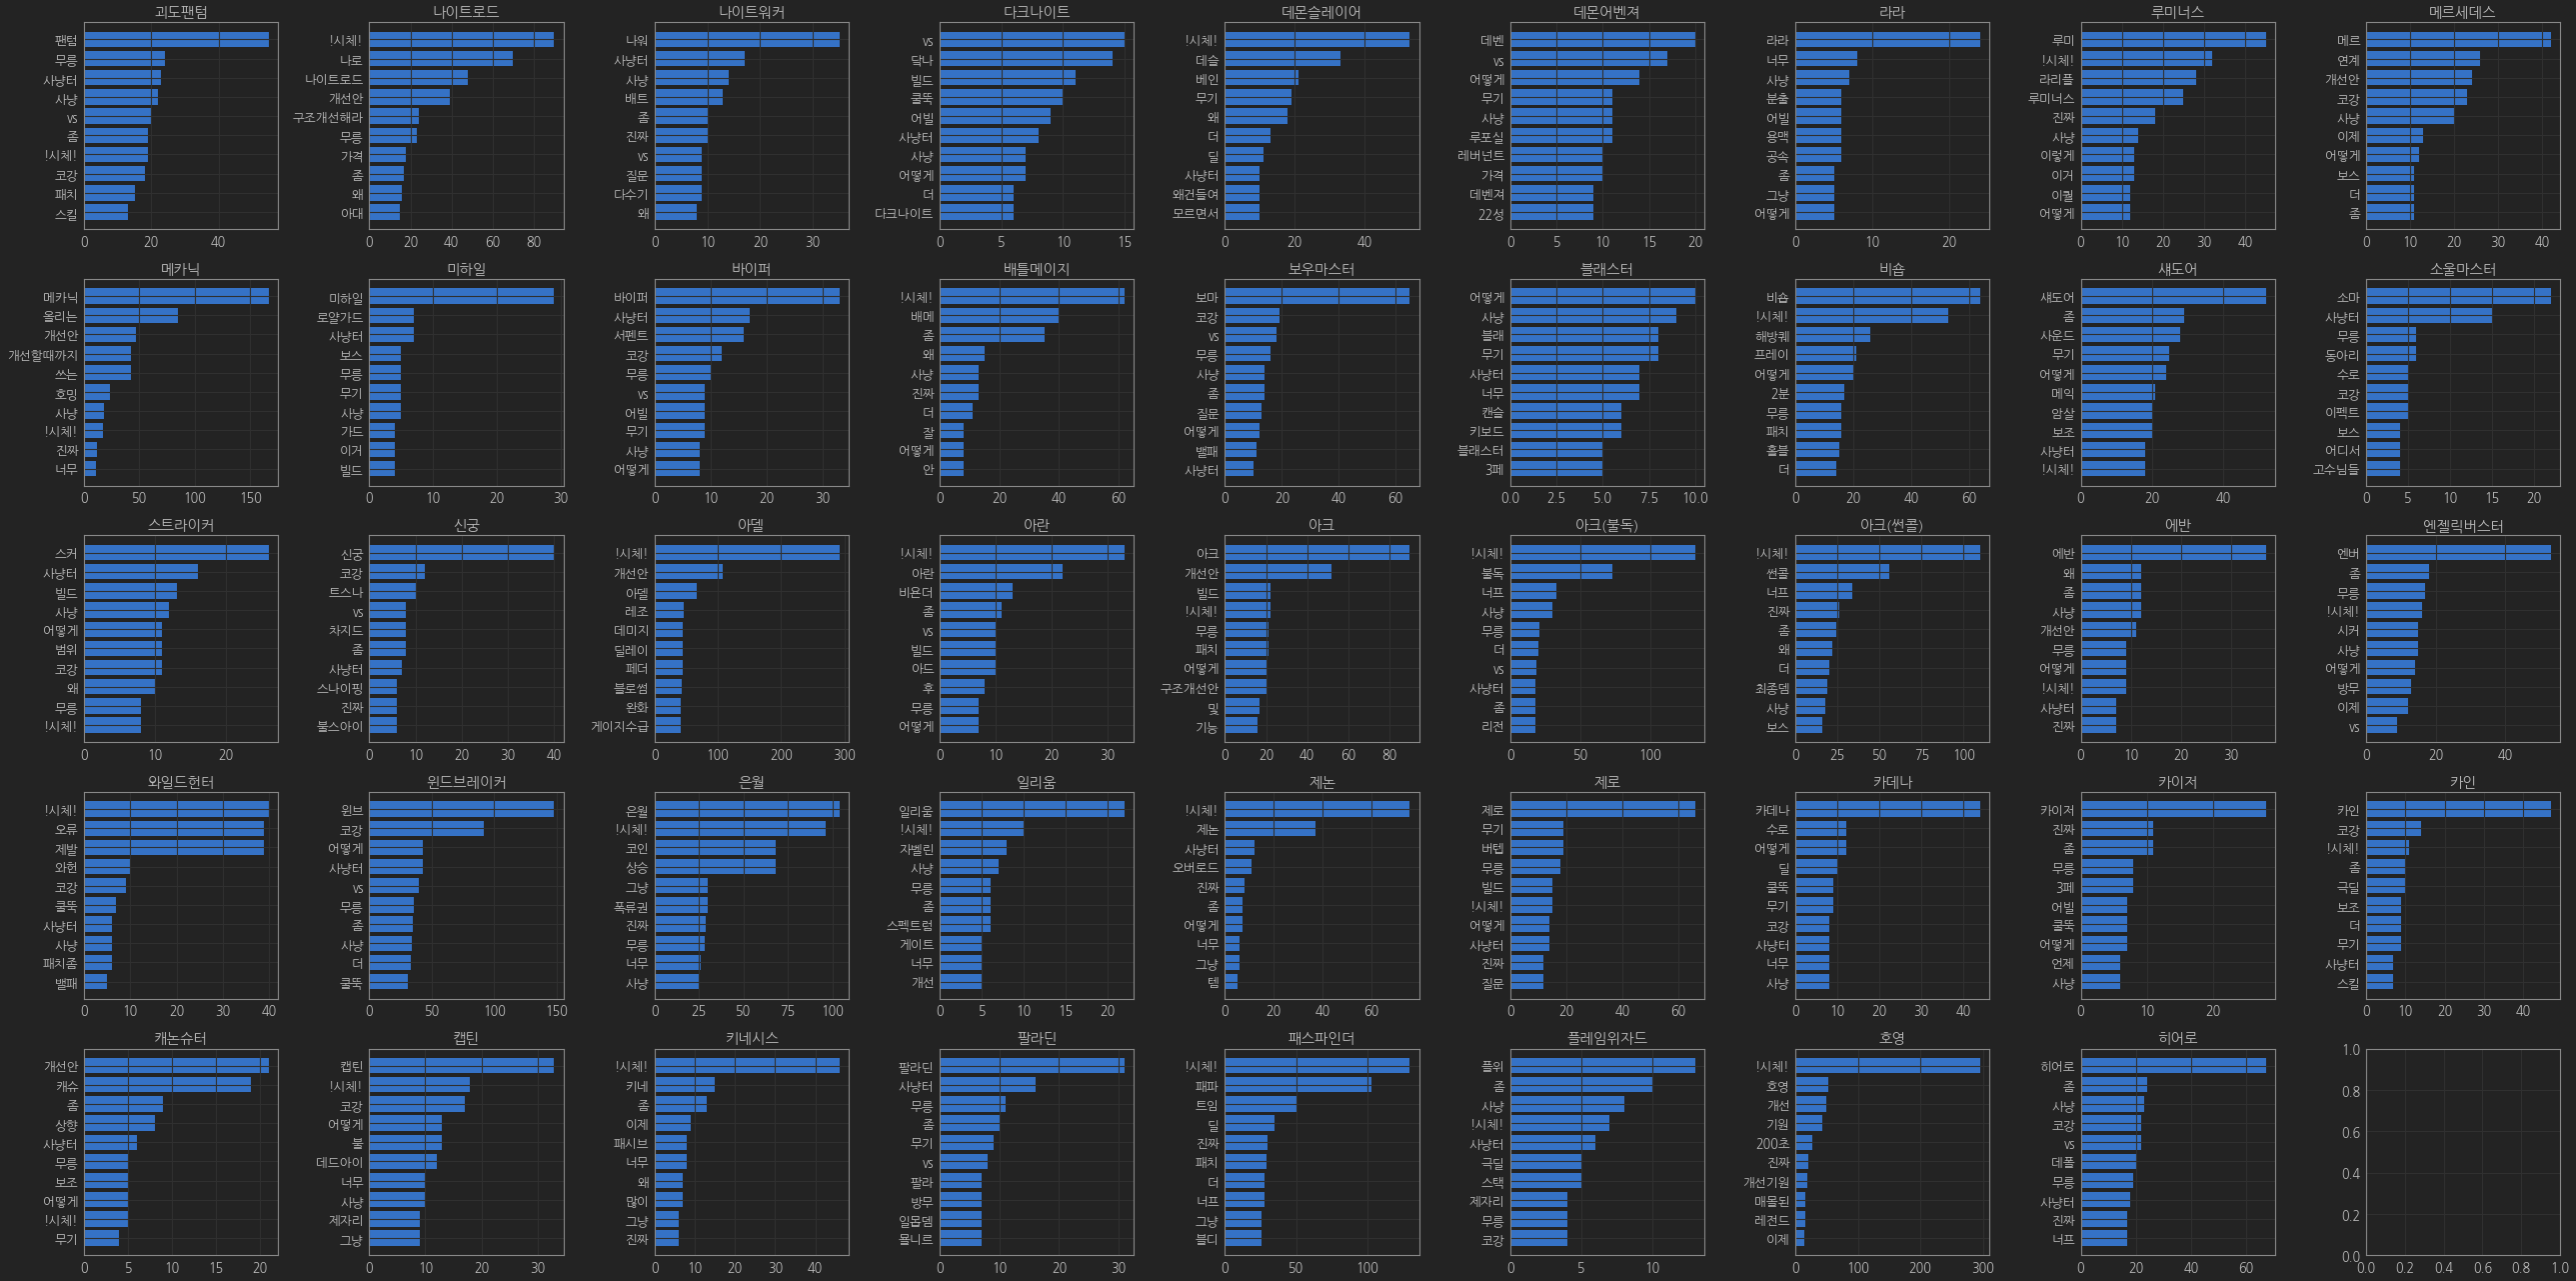

In [50]:
ncols = 9
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(36, 18))
for idx, job in enumerate(word_per_job):
    cur_ax = axs[idx // ncols][idx % ncols]
    top_10 = sorted(word_per_job[job].items(), key=lambda x: x[1], reverse=True)[:10]
    cur_ax.set_title(job)
    cur_ax.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.show()